In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Set font size when plotting
plt.rcParams.update({'font.size': 16})

In [2]:
cwd = os.getcwd()

# Verification procedure

## Read-in benchmark test files (.txt) and extract runtimes to create an average based on 5 runs for each benchmark

### Serial implementation

In [3]:
os.chdir(cwd)

# Will store average runtime in tests that change N=100 to N=1000 in increments of 25
change_N_serial = []
# Will store average runtime in tests that change M=10000 to M=100000 in increments of 2500
change_M_serial = []

folder = "..\\Serial Implementation\\Serial Implementation\\Tests\\Verification"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M10000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "MC + Euler result" in line:
                temp.append(float(line.split(" ")[4].split(",")[0]))
        runtime = sum(temp)/len(temp)
        change_N_serial.append(runtime)
        file.close()

    # Test that changed M only
    if "N100_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "MC + Euler result" in line:
                temp.append(float(line.split(" ")[4].split(",")[0]))
        runtime = sum(temp)/len(temp)
        change_M_serial.append(runtime)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_serial = change_N_serial[1:] + [change_N_serial[0]]
change_M_serial = [change_M_serial[0]] + change_M_serial[2:] + [change_M_serial[1]]

change_N_serial = np.array(change_N_serial)
change_M_serial = np.array(change_M_serial)

In [4]:
print(change_N_serial.shape)
print(change_M_serial.shape)

(37,)
(37,)


### Parallel implementation

In [5]:
os.chdir(cwd)

# Will store average runtime in tests that change N=100 to N=1000 in increments of 25
change_N_parallel = []
# Will store average runtime in tests that change M=10000 to M=100000 in increments of 2500
change_M_parallel = []

folder = "Tests\Verification"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M10000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "MC + Euler result" in line:
                temp.append(float(line.split(" ")[4].split(",")[0]))
        runtime = sum(temp)/len(temp)
        change_N_parallel.append(runtime)
        file.close()

    # Test that changed M only
    if "N100_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "MC + Euler result" in line:
                temp.append(float(line.split(" ")[4].split(",")[0]))
        runtime = sum(temp)/len(temp)
        change_M_parallel.append(runtime)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_parallel = change_N_parallel[1:] + [change_N_parallel[0]]
change_M_parallel = [change_M_parallel[0]] + change_M_parallel[2:] + [change_M_parallel[1]]

change_N_parallel = np.array(change_N_parallel)
change_M_parallel = np.array(change_M_parallel)

In [6]:
print(change_N_parallel.shape)
print(change_M_parallel.shape)

(37,)
(37,)


In [7]:
os.chdir(cwd)

# Create linearly-spaced arrays based on same increments used in tests for plotting on x-axis
# in graphs
N = np.linspace(100, 1000, change_N_parallel.shape[0])
M = np.linspace(10000, 100000, change_M_parallel.shape[0])

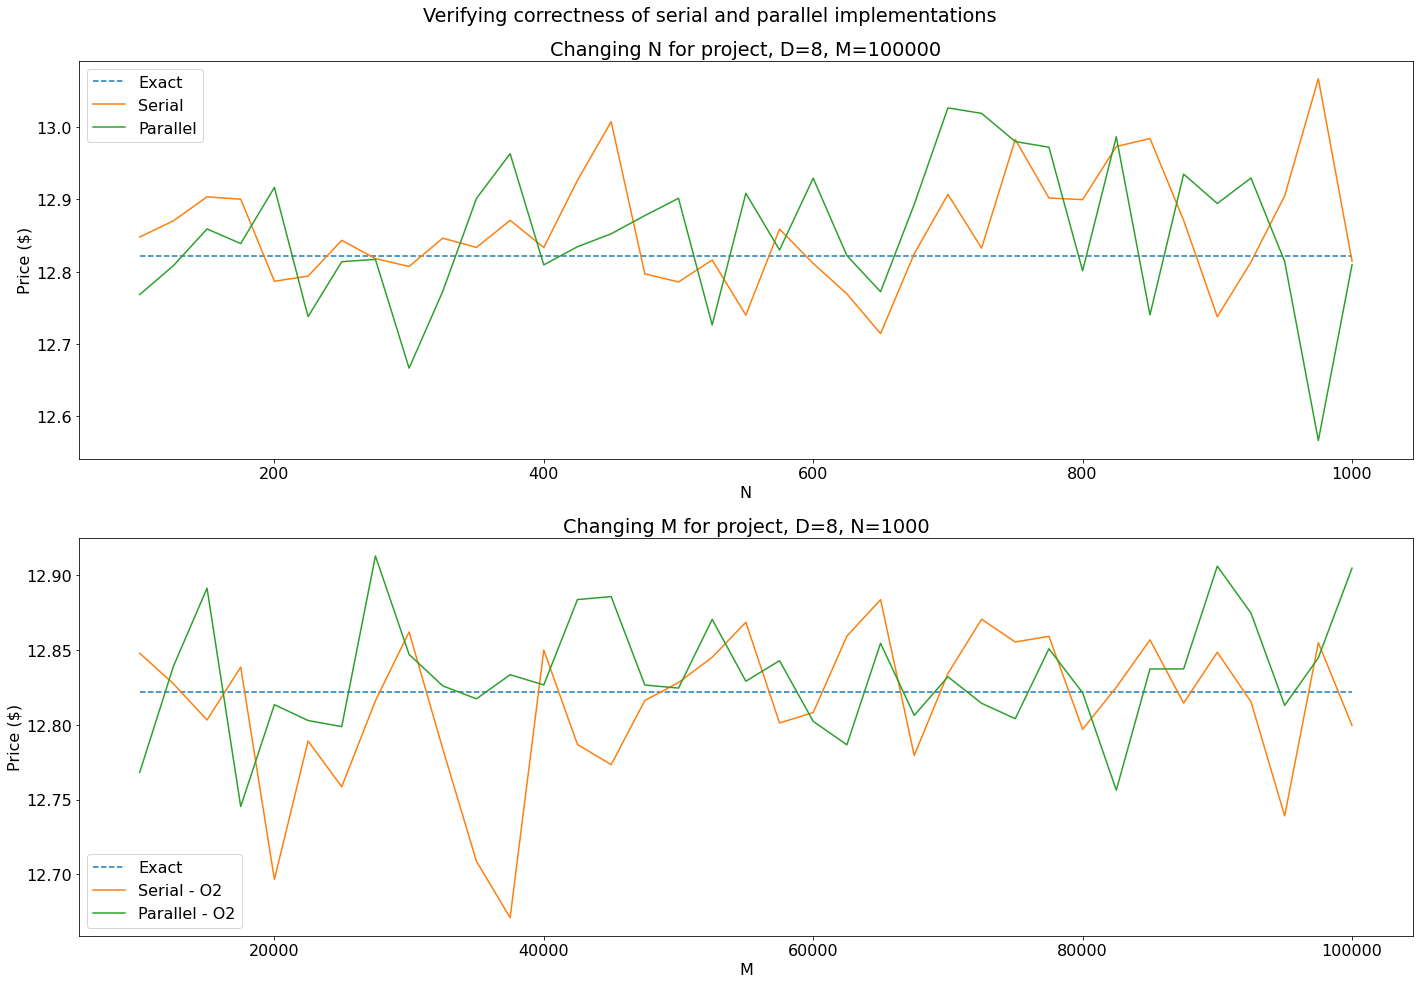

In [8]:
# Plot performance scaling results
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

# Plot the exact price
axes[0].plot(N, [12.8216]*len(N), linestyle="--", label="Exact",)
axes[0].plot(N, change_N_serial, label="Serial")
axes[0].plot(N, change_N_parallel, label="Parallel")
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Price ($)")
axes[0].set_title("Changing N for project, D=8, M=100000")
axes[0].legend()

axes[1].plot(M, [12.8216]*len(M), linestyle="--", label="Exact",)
axes[1].plot(M, change_M_serial, label="Serial - O2")
axes[1].plot(M, change_M_parallel, label="Parallel - O2")
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Price ($)")
axes[1].set_title("Changing M for project, D=8, N=1000")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Verifying correctness of serial and parallel implementations")

fig.tight_layout()
# fig.savefig("verify.png", facecolor="w")

# Performance comparison on small problem sets

## Read-in benchmark test files (.txt) and extract runtimes to create an average based on 20 runs for each benchmark

### Serial implementation

In [9]:
os.chdir(cwd)

# Will store average runtime in tests that change N=100 to N=1000 in increments of 25
change_N_serial = []
# Will store average runtime in tests that change M=10000 to M=100000 in increments of 2500
change_M_serial = []

folder = "..\\Serial Implementation\\Serial Implementation\\Tests\\Flags"
os.chdir(folder)
for sub_folder in ["O0", "O1", "O2", "O3", "O3_ffast_math"]:
    try:
        os.chdir(sub_folder)
    except:
        os.chdir("..\\" + sub_folder)
    
    # Temporary lists to calculate average runtime
    temp_N = []
    temp_M = []
    for file_name in os.listdir():
        # Test that changed N only
        if "M10000." in file_name:
            file = open(file_name, "r")
            temp = []
            for line in file.readlines():
                if "Total runtime" in line:
                    temp.append(float(line.split(" ")[-1].rstrip("\n")))
            runtime = sum(temp)/len(temp)
            temp_N.append(runtime)
            file.close()
        
        # Test that changed M only
        if "N100_" in file_name:
            file = open(file_name, "r")
            temp = []
            for line in file.readlines():
                if "Total runtime" in line:
                    temp.append(float(line.split(" ")[-1].rstrip("\n")))
            runtime = sum(temp)/len(temp)
            temp_M.append(runtime)
            file.close()
    
    # Modifies lists so runtime based on increasing N and M in ascending order
    # (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
    temp_N = temp_N[1:] + [temp_N[0]]
    temp_M = [temp_M[0]] + temp_M[2:] + [temp_M[1]]
    
    change_N_serial.append(temp_N)
    change_M_serial.append(temp_M)

change_N_serial = np.array(change_N_serial)
change_M_serial = np.array(change_M_serial)

In [10]:
print(change_N_serial.shape)
print(change_M_serial.shape)

(5, 37)
(5, 37)


### Parallel implementation

In [11]:
os.chdir(cwd)

# Will store average runtime in tests that change N=100 to N=1000 in increments of 25
change_N_parallel = []
# Will store average runtime in tests that change M=10000 to M=100000 in increments of 2500
change_M_parallel = []

folder = "Tests\Flags\O2"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M10000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_N_parallel.append(runtime)
        file.close()

    # Test that changed M only
    if "N100_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_M_parallel.append(runtime)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_parallel = change_N_parallel[1:] + [change_N_parallel[0]]
change_M_parallel = [change_M_parallel[0]] + change_M_parallel[2:] + [change_M_parallel[1]]

change_N_parallel = np.array(change_N_parallel)
change_M_parallel = np.array(change_M_parallel)

In [12]:
print(change_N_parallel.shape)
print(change_M_parallel.shape)

(37,)
(37,)


In [13]:
os.chdir(cwd)

# Create linearly-spaced arrays based on same increments used in tests for plotting on x-axis
# in graphs
N = np.linspace(100, 1000, change_N_parallel.shape[0])
M = np.linspace(10000, 100000, change_M_parallel.shape[0])

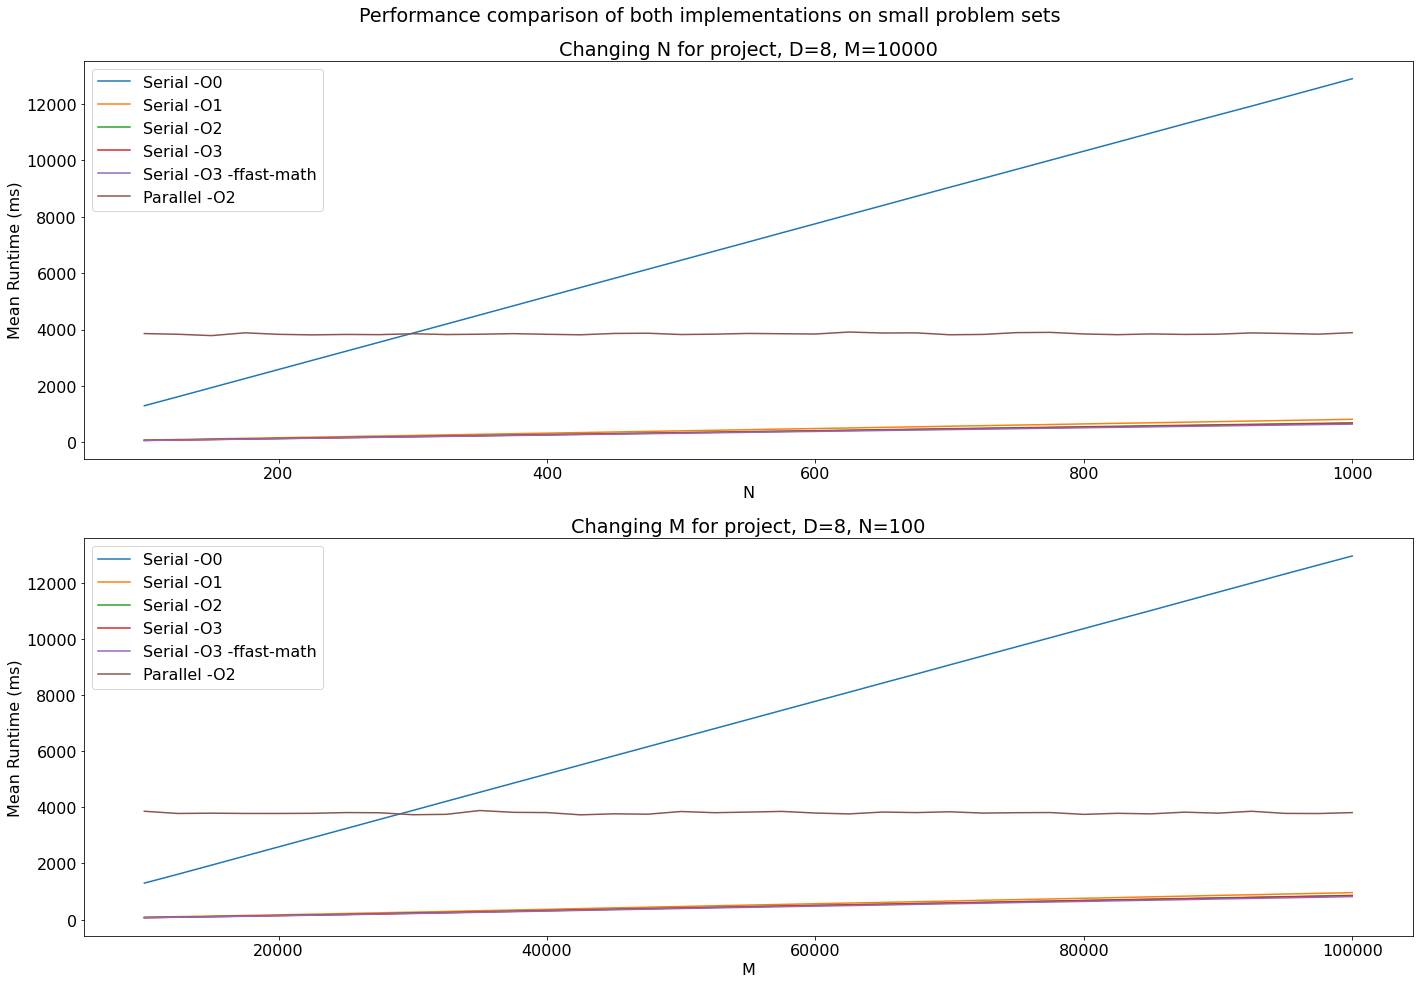

In [14]:
# Plot raw performance results (-O0 included, no scale set on y-axis)
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N_serial[0, :], label="Serial -O0")
axes[0].plot(N, change_N_serial[1, :], label="Serial -O1")
axes[0].plot(N, change_N_serial[2, :], label="Serial -O2")
axes[0].plot(N, change_N_serial[3, :], label="Serial -O3")
axes[0].plot(N, change_N_serial[4, :], label="Serial -O3 -ffast-math")
axes[0].plot(N, change_N_parallel, label="Parallel -O2")
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Mean Runtime (ms)")
axes[0].set_title("Changing N for project, D=8, M=10000")
axes[0].legend()

axes[1].plot(M, change_M_serial[0, :], label="Serial -O0")
axes[1].plot(M, change_M_serial[1, :], label="Serial -O1")
axes[1].plot(M, change_M_serial[2, :], label="Serial -O2")
axes[1].plot(M, change_M_serial[3, :], label="Serial -O3")
axes[1].plot(M, change_M_serial[4, :], label="Serial -O3 -ffast-math")
axes[1].plot(M, change_M_parallel[:], label="Parallel -O2")
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Mean Runtime (ms)")
axes[1].set_title("Changing M for project, D=8, N=100")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Performance comparison of both implementations on small problem sets")

fig.tight_layout()
# fig.savefig("flags_with_O0.png", facecolor="w")

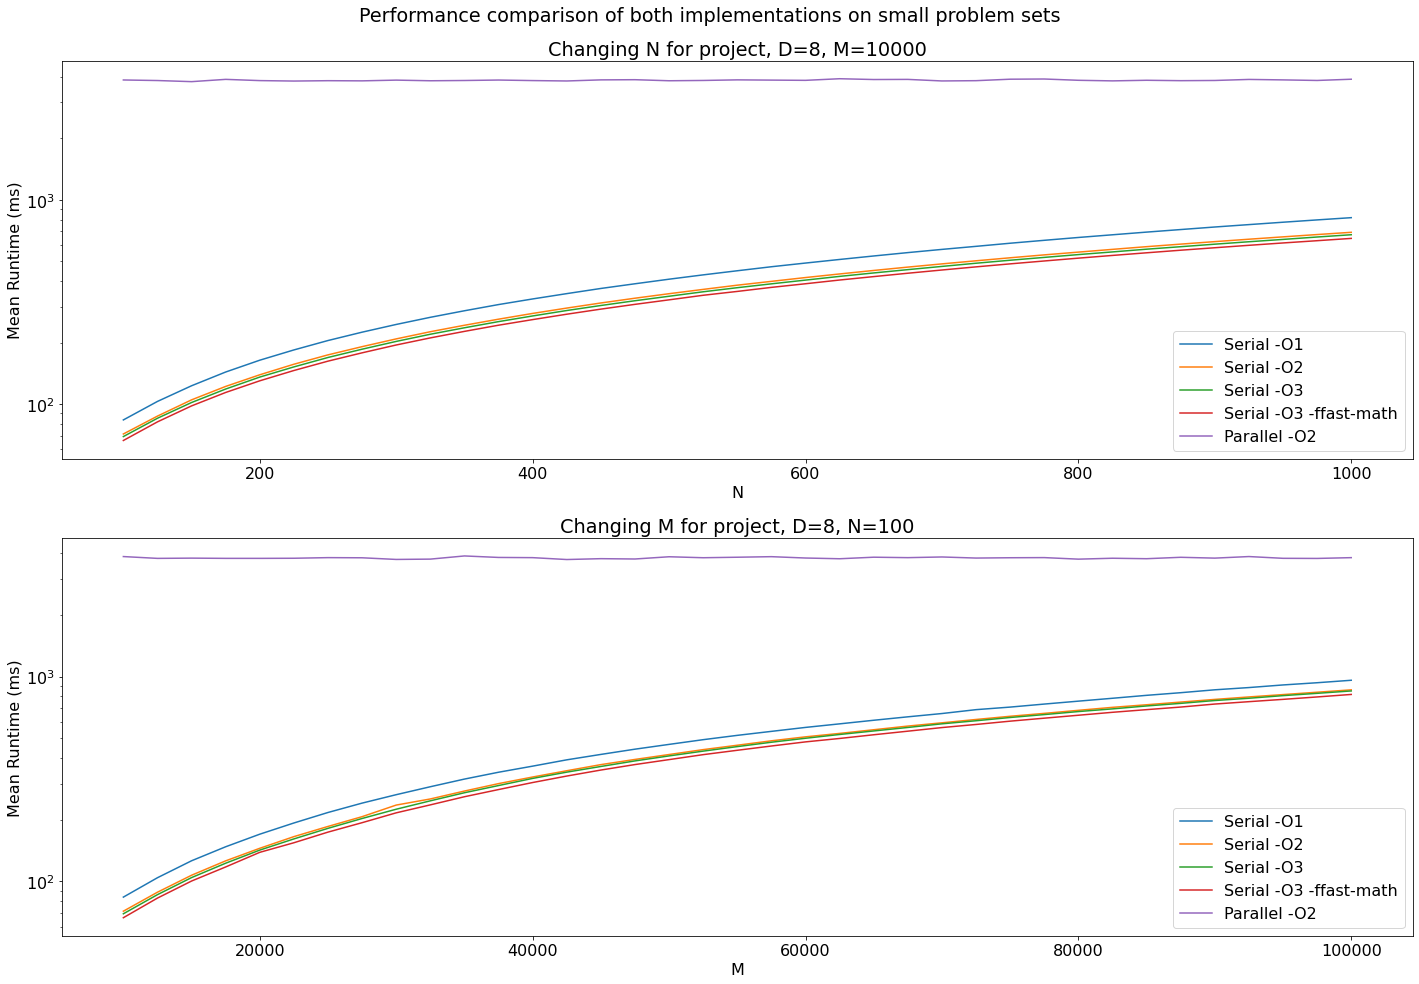

In [15]:
# Plot log-scaled y-axis performance results and don't include -O0 for clearer graph
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N_serial[1, :], label="Serial -O1")
axes[0].plot(N, change_N_serial[2, :], label="Serial -O2")
axes[0].plot(N, change_N_serial[3, :], label="Serial -O3")
axes[0].plot(N, change_N_serial[4, :], label="Serial -O3 -ffast-math")
axes[0].plot(N, change_N_parallel, label="Parallel -O2")
axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Mean Runtime (ms)")
axes[0].set_title("Changing N for project, D=8, M=10000")
axes[0].legend()

axes[1].plot(M, change_M_serial[1, :], label="Serial -O1")
axes[1].plot(M, change_M_serial[2, :], label="Serial -O2")
axes[1].plot(M, change_M_serial[3, :], label="Serial -O3")
axes[1].plot(M, change_M_serial[4, :], label="Serial -O3 -ffast-math")
axes[1].plot(M, change_M_parallel[:], label="Parallel -O2")
axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Mean Runtime (ms)")
axes[1].set_title("Changing M for project, D=8, N=100")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Performance comparison of both implementations on small problem sets")

fig.tight_layout()
# fig.savefig("flags_without_O0.png", facecolor="w")

# Performance comparison with high problem scaling

## Read-in benchmark test files (.txt) and extract runtimes to create an average based on 5 runs for each benchmark

### Serial implementation

In [16]:
os.chdir(cwd)

# Will store average runtime in tests that change N=1000 to N=10000 in increments of 1000
change_N_serial = []
# Will store average runtime in tests that change M=100000 to M=1000000 in increments of 100000
change_M_serial = []

folder = "..\\Serial Implementation\\Serial Implementation\\Tests\\Scaling"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M100000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_N_serial.append(runtime)
        file.close()

    # Test that changed M only
    if "N1000_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_M_serial.append(runtime)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_serial = change_N_serial[1:] + [change_N_serial[0]]
change_M_serial = [change_M_serial[0]] + change_M_serial[2:] + [change_M_serial[1]]

change_N_serial = np.array(change_N_serial)
change_M_serial = np.array(change_M_serial)

In [17]:
print(change_N_serial.shape)
print(change_M_serial.shape)

(10,)
(10,)


### Parallel implementation

In [18]:
os.chdir(cwd)

# Will store average runtime in tests that change N=1000 to N=10000 in increments of 1000
change_N_parallel = []
# Will store average runtime in tests that change M=100000 to M=1000000 in increments of 100000
change_M_parallel = []

folder = "Tests\Scaling"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M100000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_N_parallel.append(runtime)
        file.close()

    # Test that changed M only
    if "N1000_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        runtime = sum(temp)/len(temp)
        change_M_parallel.append(runtime)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_parallel = change_N_parallel[1:] + [change_N_parallel[0]]
change_M_parallel = [change_M_parallel[0]] + change_M_parallel[2:] + [change_M_parallel[1]]

change_N_parallel = np.array(change_N_parallel)
change_M_parallel = np.array(change_M_parallel)

In [19]:
print(change_N_parallel.shape)
print(change_M_parallel.shape)

(10,)
(10,)


In [20]:
os.chdir(cwd)

# Create linearly-spaced arrays based on same increments used in tests for plotting on x-axis
# in graphs
N = np.linspace(1000, 10000, change_N_serial.shape[0])
M = np.linspace(100000, 1000000, change_M_serial.shape[0])

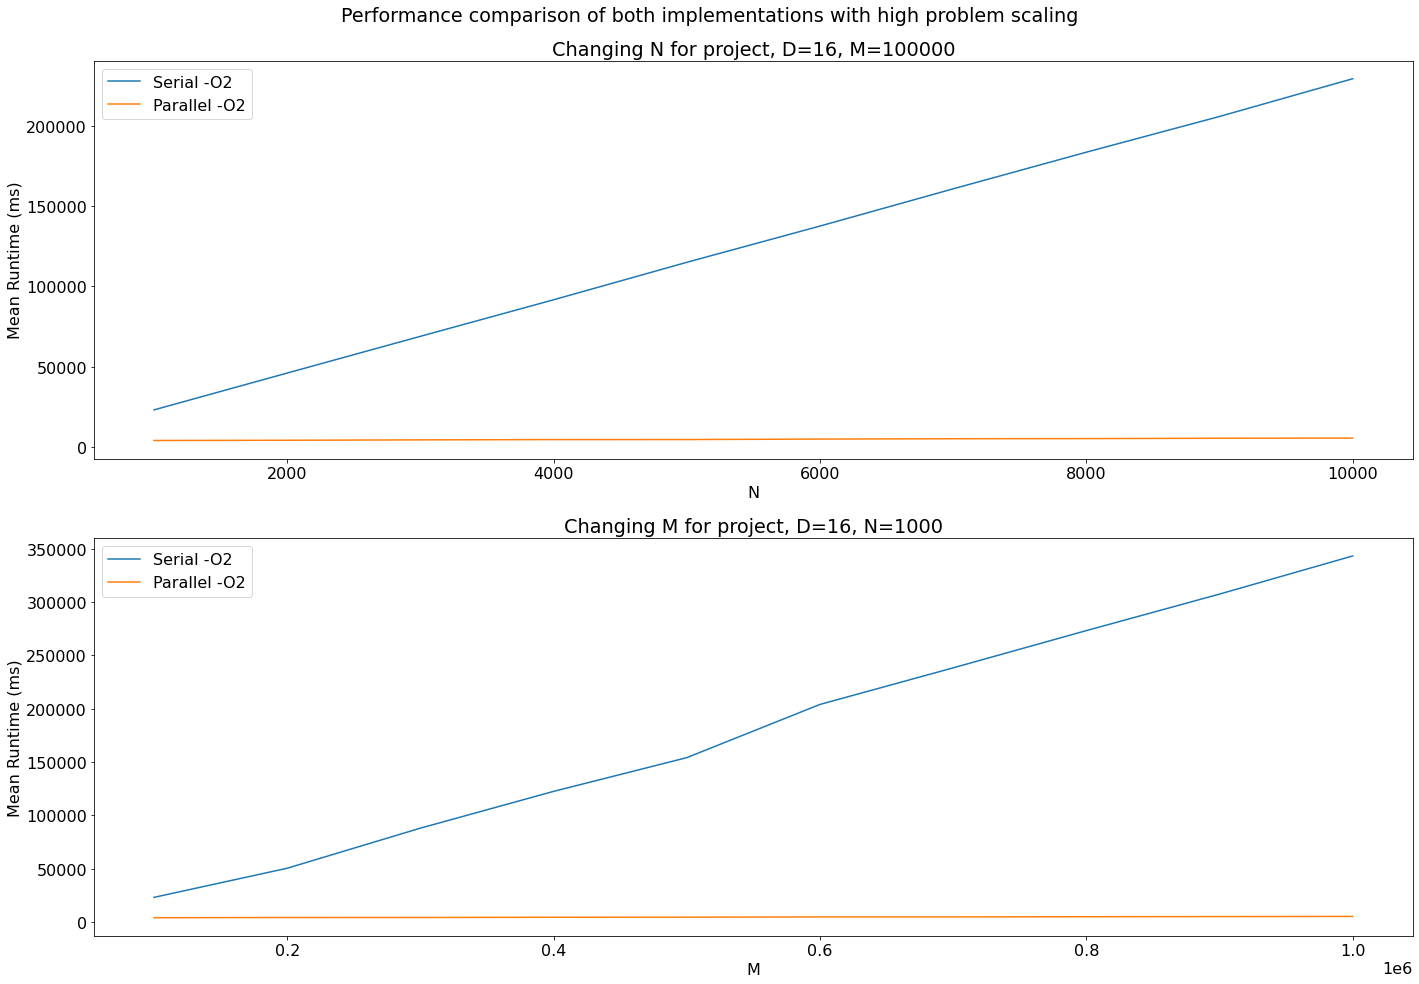

In [21]:
# Plot performance scaling results
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N_serial, label="Serial -O2")
axes[0].plot(N, change_N_parallel, label="Parallel -O2")
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Mean Runtime (ms)")
axes[0].set_title("Changing N for project, D=16, M=100000")
axes[0].legend()

axes[1].plot(M, change_M_serial, label="Serial -O2")
axes[1].plot(M, change_M_parallel, label="Parallel -O2")
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Mean Runtime (ms)")
axes[1].set_title("Changing M for project, D=16, N=1000")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Performance comparison of both implementations with high problem scaling")

fig.tight_layout()
# fig.savefig("scaling.png", facecolor="w")

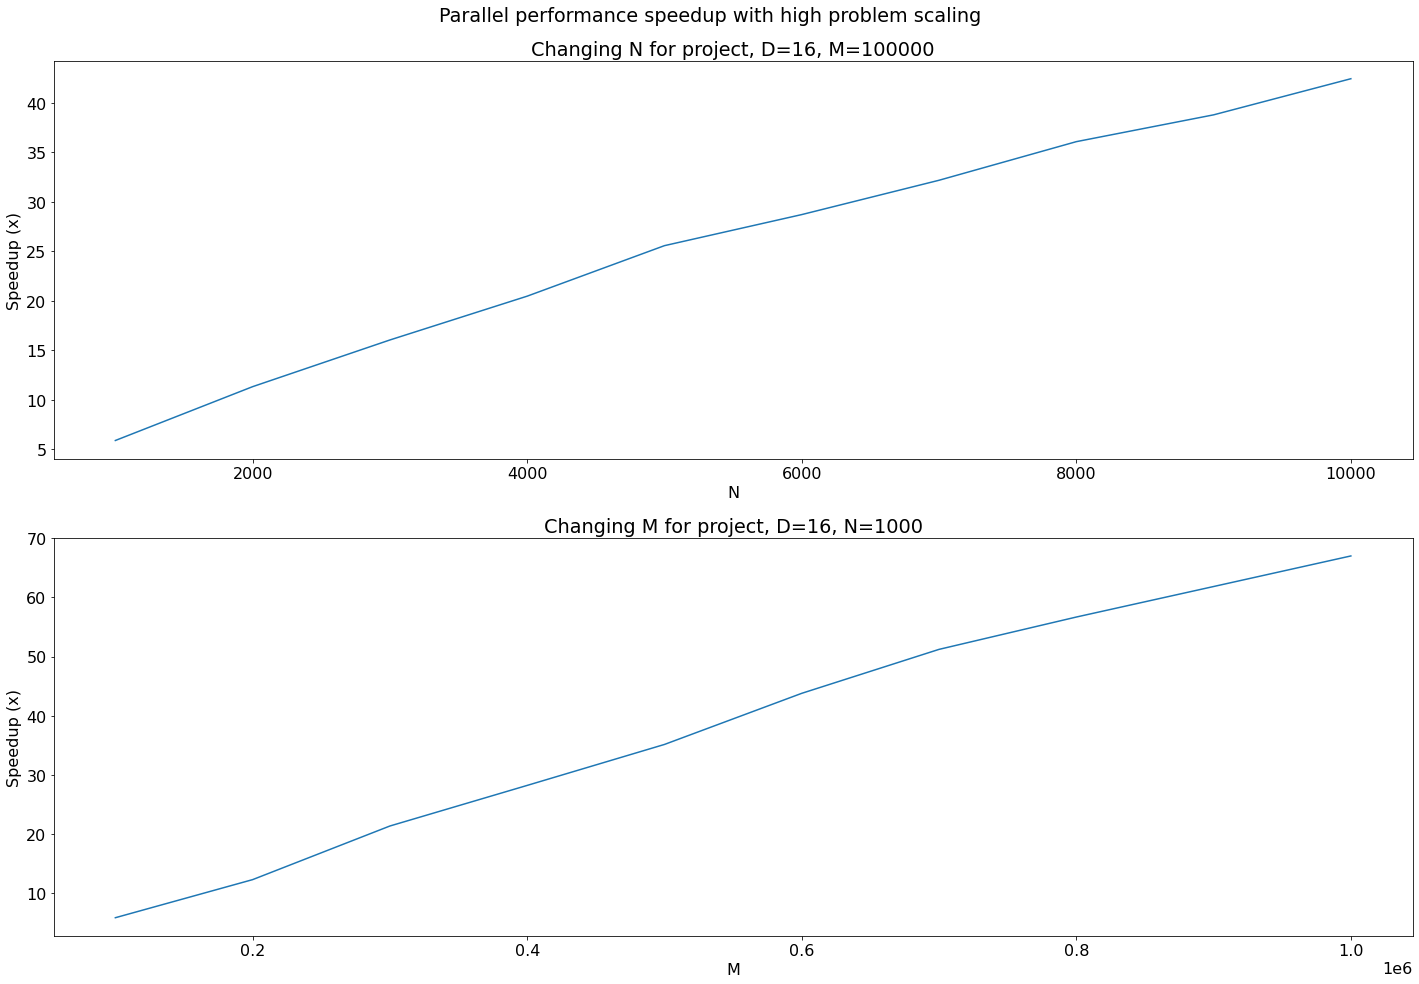

In [22]:
# Plot performance scaling results
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N_serial/change_N_parallel)
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Speedup (x)")
axes[0].set_title("Changing N for project, D=16, M=100000")

axes[1].plot(M, change_M_serial/change_M_parallel)
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Speedup (x)")
axes[1].set_title("Changing M for project, D=16, N=1000")

# Title for whole subplot
fig.suptitle("Parallel performance speedup with high problem scaling")

fig.tight_layout()
# fig.savefig("scaling_speedup.png", facecolor="w")

# Using more vertical GPU threads in computing S_n

In [23]:
os.chdir(cwd)

# Will store average runtime in tests that change N=1000 to N=10000 in increments of 1000
change_N_parallel = []
# Will store average runtime in tests that change M=100000 to M=1000000 in increments of 100000
change_M_parallel = []

folder = "Tests\Threads"
os.chdir(folder)
for file_name in os.listdir():
    # Test that changed N only
    if "M100000." in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        change_N_parallel.append(temp)
        file.close()

    # Test that changed M only
    if "N1000_" in file_name:
        file = open(file_name, "r")
        temp = []
        for line in file.readlines():
            if "Total runtime" in line:
                temp.append(float(line.split(" ")[-1].rstrip("\n")))
        change_M_parallel.append(temp)
        file.close()

# Modifies lists so runtime based on increasing N and M in ascending order
# (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
change_N_parallel = change_N_parallel[1:] + [change_N_parallel[0]]
change_M_parallel = [change_M_parallel[0]] + change_M_parallel[2:] + [change_M_parallel[1]]

change_N_parallel = np.array(change_N_parallel)
change_M_parallel = np.array(change_M_parallel)

In [24]:
os.chdir(cwd)

print(change_N_parallel.shape)
print(change_M_parallel.shape)

(10, 3)
(10, 3)


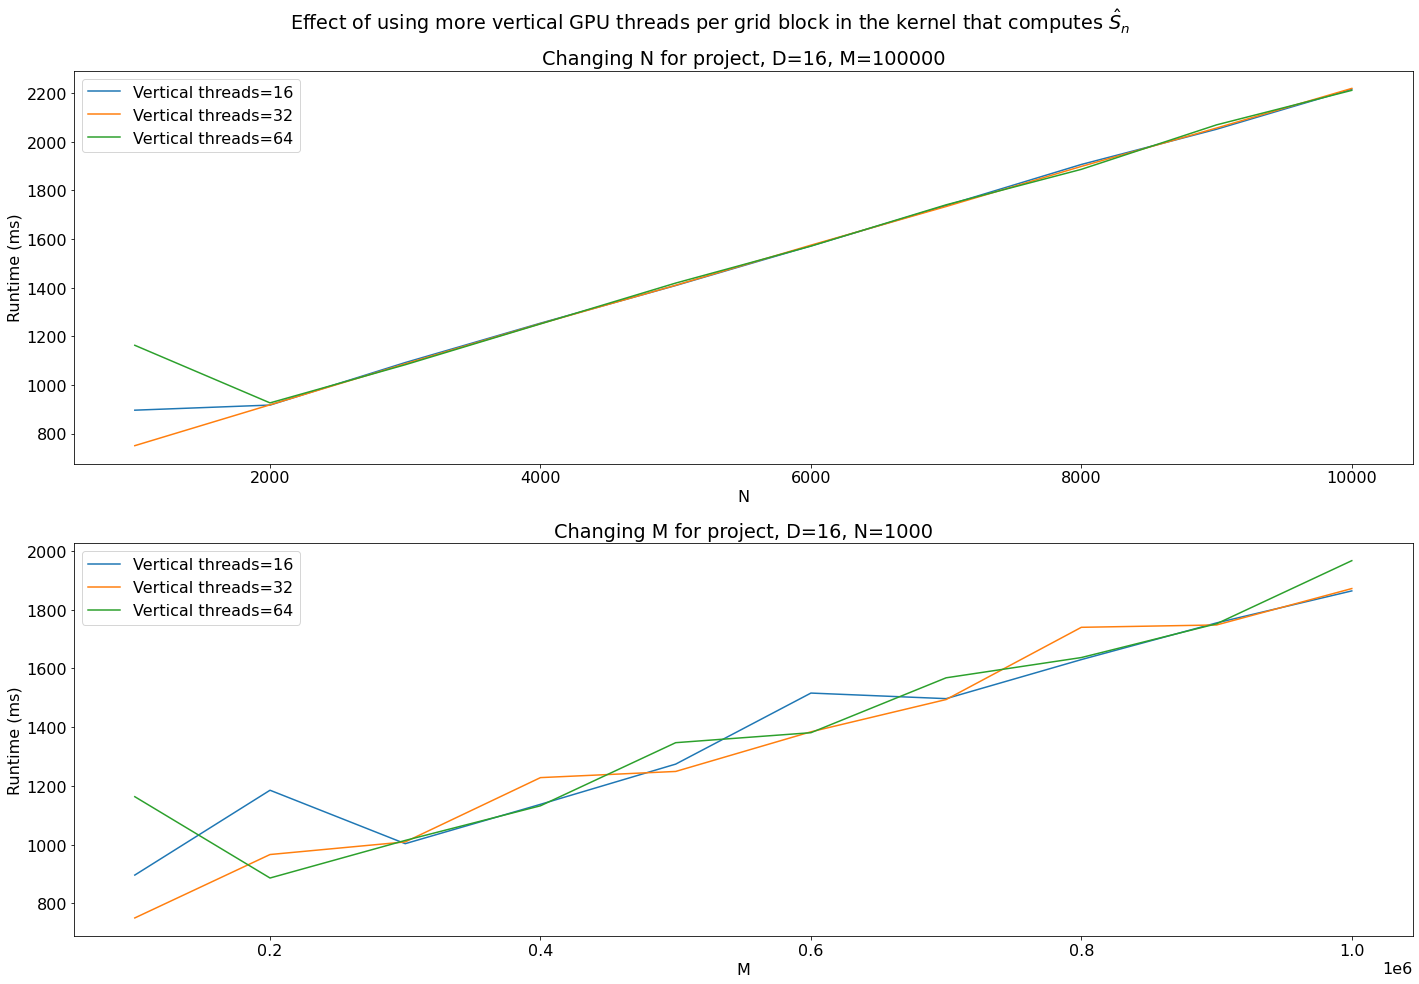

In [25]:
# Plot performance scaling results
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N_parallel[:, 0], label="Vertical threads=16")
axes[0].plot(N, change_N_parallel[:, 1], label="Vertical threads=32")
axes[0].plot(N, change_N_parallel[:, 2], label="Vertical threads=64")
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Runtime (ms)")
axes[0].set_title("Changing N for project, D=16, M=100000")
axes[0].legend()

axes[1].plot(M, change_M_parallel[:, 0], label="Vertical threads=16")
axes[1].plot(M, change_M_parallel[:, 1], label="Vertical threads=32")
axes[1].plot(M, change_M_parallel[:, 2], label="Vertical threads=64")
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Runtime (ms)")
axes[1].set_title("Changing M for project, D=16, N=1000")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Effect of using more vertical GPU threads per grid block in the kernel that computes $\hat{S}_n$")

fig.tight_layout()
# fig.savefig("threads.png", facecolor="w")